<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librarys-used" data-toc-modified-id="Librarys-used-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librarys used</a></span></li><li><span><a href="#Signal-loading-and-processing" data-toc-modified-id="Signal-loading-and-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Signal loading and processing</a></span></li><li><span><a href="#Plots" data-toc-modified-id="Plots-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plots</a></span><ul class="toc-item"><li><span><a href="#Signal" data-toc-modified-id="Signal-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Signal</a></span></li><li><span><a href="#Signal-with-peaks-detected" data-toc-modified-id="Signal-with-peaks-detected-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Signal with peaks detected</a></span></li><li><span><a href="#Templates" data-toc-modified-id="Templates-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Templates</a></span></li><li><span><a href="#Heart-rate" data-toc-modified-id="Heart-rate-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Heart rate</a></span></li></ul></li></ul></div>

# Biosspy peak detector

## Librarys used

In [1]:
from biosppy import storage
from biosppy.signals import ecg
import matplotlib.pyplot as plt
import numpy as np

## Signal loading and processing

In [2]:
signal, mdata = storage.load_txt('datos/ecg.txt')
out = ecg.ecg(signal=signal, sampling_rate=1000., show=False)
(ts, filtered, rpeaks, templates_ts, templates, heart_rate_ts, heart_rate) = out

## Plots

### Signal

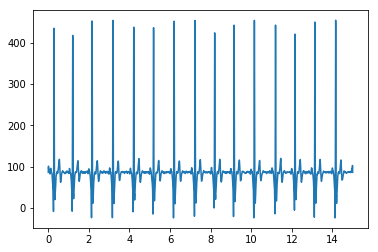

In [3]:
plt.plot(ts, filtered)
plt.show()

### Signal with peaks detected

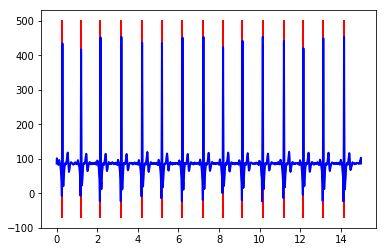

In [4]:
(fig, ax) = plt.subplots()
ax.plot(ts, filtered)

ymin = np.min(filtered)
ymax = np.max(filtered)
alpha = 0.1 * (ymax - ymin)
ymax += alpha
ymin -= alpha
    
ax.plot(ts, filtered, linewidth=2, label='Filtered', color="b")
ax.vlines(ts[rpeaks], ymin, ymax,
           color='r',
           linewidth=2,
           label='R-peaks')
plt.show()

### Templates

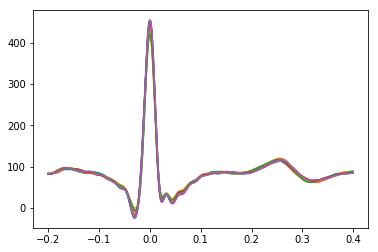

In [5]:
plt.plot(templates_ts, templates.T)
plt.show()

### Heart rate

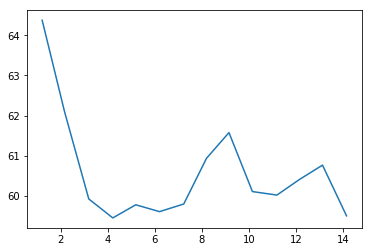

In [6]:
plt.plot(heart_rate_ts, heart_rate)
plt.show()